In [23]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler

In [24]:
data = pd.read_csv('PimaIndiansDiabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#1
Outcome is categorical because there are only two possibilities.
The BMI and DiabetesPedigreeFunction are numerical because they have decimals and the rest (Glucose, BloodPressure, SkinThickness, Insulin, Age) are numerical because the order of the values is important.
Pregnancies can be considered categorical if we assume the fixed number of unique pregnancies in the data set are the only values possible. 

In [25]:
# 1
# converting data to correct type
data['Outcome_cat'] = data['Outcome'].astype('category') 

<AxesSubplot:xlabel='Glucose', ylabel='Outcome_cat'>

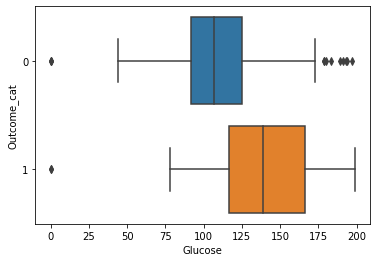

In [26]:
# 2
# Box plot for Glucose variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'Glucose', y = 'Outcome_cat')

<AxesSubplot:xlabel='BloodPressure', ylabel='Outcome_cat'>

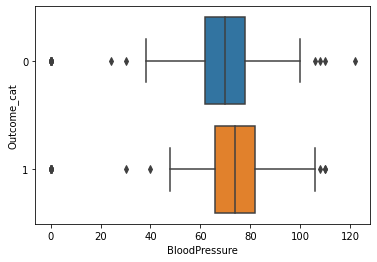

In [27]:
# 2
# Box plot for BloodPressure variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'BloodPressure', y = 'Outcome_cat')

<AxesSubplot:xlabel='SkinThickness', ylabel='Outcome_cat'>

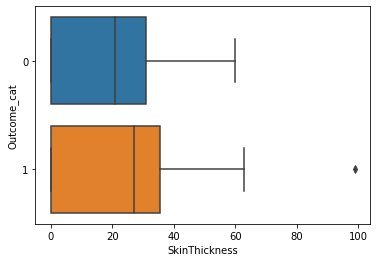

In [28]:
# 2
# Box plot for SkinThickness variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'SkinThickness', y = 'Outcome_cat')

<AxesSubplot:xlabel='Insulin', ylabel='Outcome_cat'>

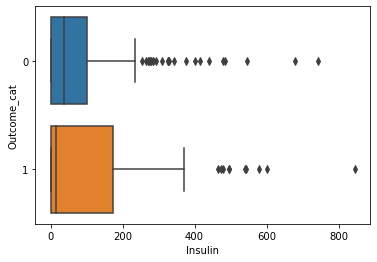

In [29]:
# 2
# Box plot for Insulin variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'Insulin', y = 'Outcome_cat')

<AxesSubplot:xlabel='BMI', ylabel='Outcome_cat'>

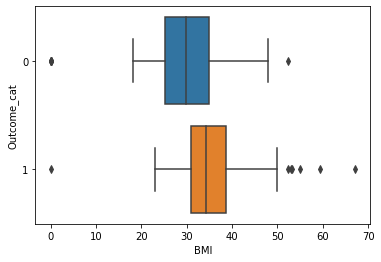

In [30]:
# 2
# Box plot for BMI variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'BMI', y = 'Outcome_cat')

<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Outcome_cat'>

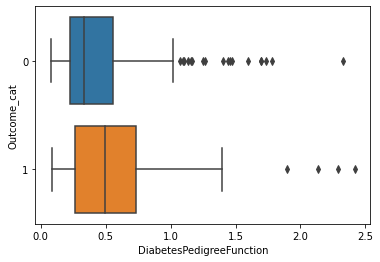

In [31]:
# 2
# Box plot for DiabetesPedigreeFunction variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'DiabetesPedigreeFunction', y = 'Outcome_cat')

<AxesSubplot:xlabel='Age', ylabel='Outcome_cat'>

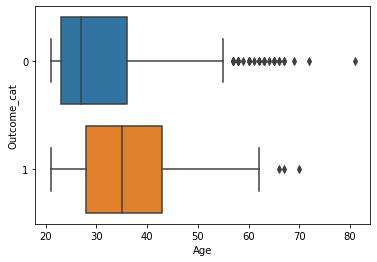

In [32]:
# 2
# Box plot for Age variable against catgorical Outcome variable
sns.boxplot(data = data, x = 'Age', y = 'Outcome_cat')

Text(0, 0.5, 'Outcome Count')

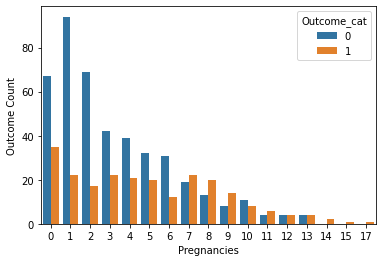

In [33]:
# 2 Bar plot for Pregnancy categorical against outcome
preg_groups_count = data.groupby(by = ['Outcome_cat','Pregnancies'], as_index=False).count()
preg_axis = sns.barplot(data=preg_groups_count, x = 'Pregnancies', y = 'Glucose',hue = 'Outcome_cat')
preg_axis.set_ylabel('Outcome Count')

In [34]:
# dropping cat_column
data = data.drop('Outcome_cat', axis = 1)

#3
With the exception of pregnancies and outcome, all the other 0's must be representing NA's/missing value

In [35]:
# 3
# making two data sets, one where I will replace 0 with median, another where I drop rows with 0
data_median = data.copy()
data_drop = data.copy()
# Replacing missing values with median
for col in data_median.columns:
    if col in ['Pregnancies','Outcome']:
        continue
    else:
        data_median[col] = data_median[col].replace(0,data_median[col].median())
# Dropping rows with missing values
for col in data_drop.columns:
    if col in ['Pregnancies','Outcome']:
        continue
    else:
        data_drop[col] = data_drop[col].replace(0,np.NaN)
data_drop = data_drop.dropna()

#3
After doing both methods of replacing with median and dropping rows, it was seen that dropping rows with NA values resulted in an almost 50% loss in data. Due to this, I will be proceeding with the data set in which I replaced the missing values with the median value of the column. 

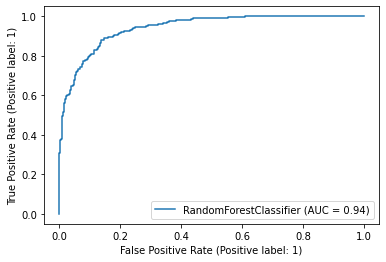

In [36]:
# 4
# I will use 10xfold Cross Validation for testing
# First, I will do randomForest
param_rf = {'max_features':['sqrt','log2', 2, 3, 4, 5, 6, 7, None],
        'max_depth':[2, 3, 4, 5, 6, 7],
        'n_estimators':np.arange(10,100,10)}

rf_model = RandomForestClassifier(random_state= 777)
grid_rf = GridSearchCV(rf_model, param_rf, cv = 10)
best_rf = grid_rf.fit(data.drop('Outcome', axis = 1), data['Outcome']).best_estimator_
plot_roc_curve(best_rf,data.drop('Outcome', axis = 1), data['Outcome'])

In [37]:
# Finding best parameters for random forest
print(best_rf)

RandomForestClassifier(max_depth=5, max_features=None, n_estimators=70,
                       random_state=777)


SVC(C=1.4000000000000001, random_state=777)


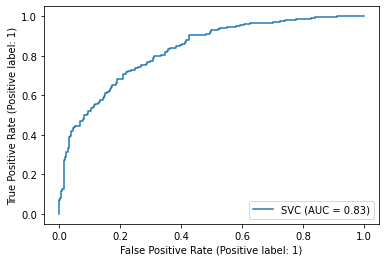

In [38]:
# 4
# Performing SVM Classification
param_svc = {'C':np.arange(0.1,2.0,0.1)}

svc_model = SVC(random_state= 777)
grid_svc = GridSearchCV(svc_model, param_svc, cv = 10)
best_svc = grid_svc.fit(data.drop('Outcome', axis = 1), data['Outcome']).best_estimator_
plot_roc_curve(best_svc,data.drop('Outcome', axis = 1), data['Outcome'])
print(best_svc)

KNeighborsClassifier(n_neighbors=14)


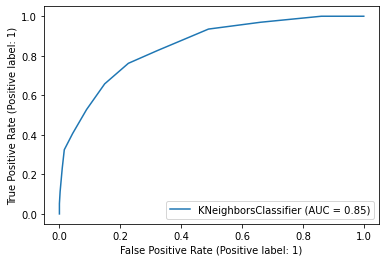

In [40]:
# 4
# Performing KNN Classification
param_knn = {'n_neighbors':np.arange(3,15,1)}

knn_model = KNeighborsClassifier()
grid_knn = GridSearchCV(knn_model, param_knn, cv = 10)
best_knn = grid_knn.fit(data.drop('Outcome', axis = 1), data['Outcome']).best_estimator_
plot_roc_curve(best_knn,data.drop('Outcome', axis = 1), data['Outcome'])
print(best_knn)